In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset = pd.read_csv("twitter.csv")

In [3]:
dataset["labels"] = dataset["class"].map({0: "Hate Speech",
                                          1: "Offensive Language",
                                          2: "No hate or offensive language"})

In [4]:
dataset

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,labels
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,No hate or offensive language
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,Offensive Language
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Offensive Language
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,Offensive Language
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,Offensive Language
...,...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,Offensive Language
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an...",No hate or offensive language
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...,Offensive Language
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies,Offensive Language


In [5]:
data = dataset[["tweet","labels"]]

In [6]:
import re
import nltk
import string
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))
stemmer = nltk.SnowballStemmer("english")

In [7]:
def clean_data(text):
    text = str(text).lower()
    text = re.sub('http?://\S+|www\.s+','',text)
    text = re.sub('\[.*?\]','',text)
    text = re.sub('\<.*?>+','',text)
    text = re.sub('[%s]' %re.escape(string.punctuation),'',text)
    text = re.sub('\n','',text)
    text = re.sub('\w*\d\w*','',text)
    text = [word for word in text.split(' ') if word not in stopwords]
    text = " ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text = " ".join(text)
    return text

In [8]:
data["tweet"] = data["tweet"].apply(clean_data)

C:\Users\ANANTHAKUMAR\AppData\Local\Temp\ipykernel_1664\1832165696.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["tweet"] = data["tweet"].apply(clean_data)


In [9]:
x = np.array(data["tweet"])
y = np.array(data["labels"])

In [10]:
x

array([' rt mayasolov woman shouldnt complain clean hous amp man alway take trash',
       ' rt  boy dat coldtyga dwn bad cuffin dat hoe  place',
       ' rt urkindofbrand dawg rt  ever fuck bitch start cri confus shit',
       ..., 'young buck wanna eat dat nigguh like aint fuckin dis',
       'youu got wild bitch tellin lie',
       'ruffl  ntac eileen dahlia  beauti color combin pink orang yellow amp white coll '],
      dtype=object)

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
cv = CountVectorizer()
x = cv.fit_transform(x)

In [12]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=42)

In [13]:
x_train

<16604x25718 sparse matrix of type '<class 'numpy.int64'>'
	with 132630 stored elements in Compressed Sparse Row format>

In [14]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [15]:
y_pred = dt.predict(x_test)

In [16]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[ 156,   35,  274],
       [  29, 1126,  224],
       [ 225,  213, 5897]], dtype=int64)

In [17]:
import seaborn as sns
import matplotlib.pyplot as ply
%matplotlib inline

<AxesSubplot:>

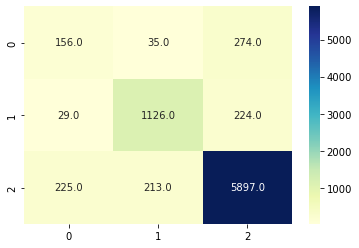

In [18]:
sns.heatmap(cm,annot=True,fmt=".1f", cmap="YlGnBu")

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

In [ ]:
sample = input()
sample = clean_data(sample)
sample
data1 = cv.transform([sample]).toarray()
data1
dt.predict(data1)